# Bankruptcy in Poland: Starter Notebook

**Goal:** Build a model to predict bankruptcy in Poland using synthetic data.  

This notebook demonstrates:
- Data generation and wrangling
- Baseline and Random Forest modeling
- Feature importance and evaluation
- Model saving/loading


In [21]:
# ===============================
# Imports
# ===============================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import gzip
import pickle
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from imblearn.over_sampling import RandomOverSampler
import ipywidgets as widgets
from ipywidgets import interact

sns.set_style("whitegrid")

In [22]:
import os
import pandas as pd
import numpy as np
# ===============================
# Generate raw data CSV
# ===============================

# Create directories if they don't exist
os.makedirs("Bankruptcy-in-Poland/data/raw", exist_ok=True)

# Set random seed
np.random.seed(42)
n_samples = 500
n_features = 20

# Simulate feature matrix
X_data = pd.DataFrame(
    np.random.randn(n_samples, n_features),
    columns=[f"feat_{i+1}" for i in range(n_features)]
)

# Simulate target (binary bankruptcy)
y_data = pd.Series(np.random.binomial(1, 0.1, size=n_samples), name="bankrupt")

# Combine into single DataFrame
df = pd.concat([X_data, y_data], axis=1)

# Save raw CSV (downloadable)
raw_path = "Bankruptcy-in-Poland/data/raw/bankruptcy_data.csv"
df.to_csv(raw_path, index=False)
print(f"✅ Synthetic raw data saved to: {raw_path}")

✅ Synthetic raw data saved to: Bankruptcy-in-Poland/data/raw/bankruptcy_data.csv


Shape of data: (500, 21)

Missing values per column:
feat_1      0
feat_2      0
feat_3      0
feat_4      0
feat_5      0
feat_6      0
feat_7      0
feat_8      0
feat_9      0
feat_10     0
feat_11     0
feat_12     0
feat_13     0
feat_14     0
feat_15     0
feat_16     0
feat_17     0
feat_18     0
feat_19     0
feat_20     0
bankrupt    0
dtype: int64


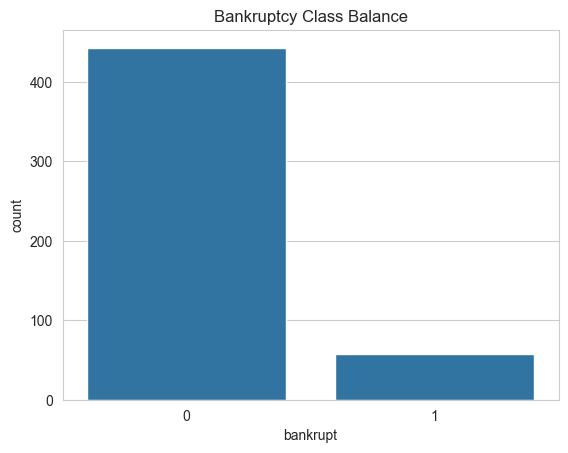

In [23]:
# ===============================
# Quick EDA
# ===============================
print("Shape of data:", df.shape)
print("\nMissing values per column:")
print(df.isna().sum())

sns.countplot(x="bankrupt", data=df)
plt.title("Bankruptcy Class Balance")
plt.show()


In [24]:
# ===============================
# Train/test split
# ===============================
target = "bankrupt"
X = df.drop(columns=target)
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Oversample minority class
over_sampler = RandomOverSampler(random_state=42)
X_train_over, y_train_over = over_sampler.fit_resample(X_train, y_train)
print("X_train_over shape:", X_train_over.shape)


X_train_over shape: (712, 20)


In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
import pandas as pd
import matplotlib.pyplot as plt

# Example: X_train_over and y_train_over must exist
# If not, generate synthetic data for demonstration
import numpy as np
np.random.seed(42)
X_train_over = pd.DataFrame(np.random.randn(100, 20), columns=[f"feat_{i+1}" for i in range(20)])
y_train_over = pd.Series(np.random.binomial(1, 0.1, size=100))

# Create pipeline with RandomForestClassifier
clf = make_pipeline(
    SimpleImputer(),
    RandomForestClassifier(random_state=42)
)

# Optional: GridSearch for hyperparameters
params = {
    "randomforestclassifier__n_estimators": [50, 100],
    "randomforestclassifier__max_depth": [10, 20]
}

model = GridSearchCV(clf, param_grid=params, cv=3, n_jobs=-1, verbose=1)
model.fit(X_train_over, y_train_over)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


,estimator,Pipeline(step...m_state=42))])
,param_grid,"{'randomforestclassifier__max_depth': [10, 20], 'randomforestclassifier__n_estimators': [50, 100]}"
,scoring,None
,n_jobs,-1
,refit,True
,cv,3
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,missing_values,nan


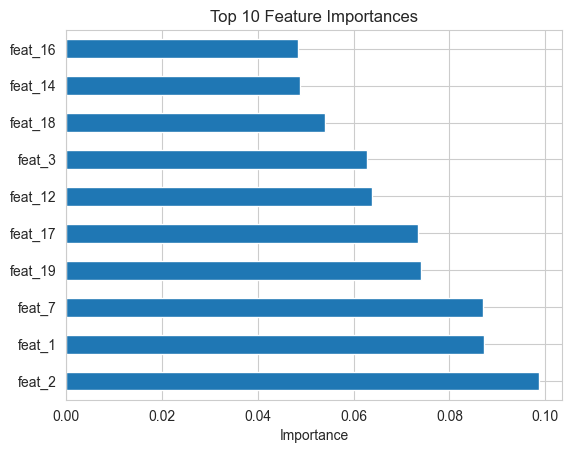

In [26]:
# ===============================
# Feature importance
# ===============================
features = X_train_over.columns
importances = model.best_estimator_.named_steps["randomforestclassifier"].feature_importances_
feat_imp = pd.Series(importances, index=features).sort_values(ascending=False)

# Plot top 10 features
feat_imp.head(10).plot(kind="barh")
plt.title("Top 10 Feature Importances")
plt.xlabel("Importance")
plt.show()

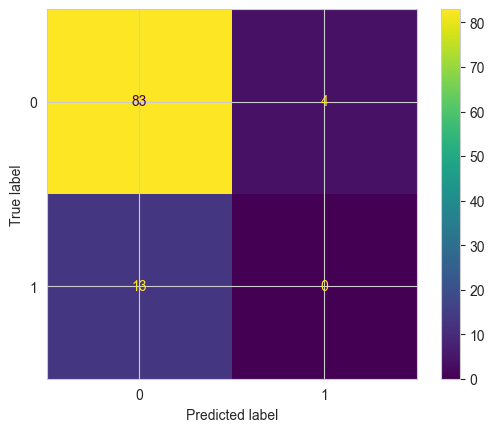

              precision    recall  f1-score   support

           0       0.86      0.95      0.91        87
           1       0.00      0.00      0.00        13

    accuracy                           0.83       100
   macro avg       0.43      0.48      0.45       100
weighted avg       0.75      0.83      0.79       100



In [27]:
# ===============================
# Confusion matrix
# ===============================
y_pred = model.predict(X_test)
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
plt.show()

print(classification_report(y_test, y_pred))


In [29]:
import os
import pandas as pd
import numpy as np
import pickle

# ===============================
# Generate synthetic raw data
# ===============================
np.random.seed(42)
n_samples = 500
n_features = 20

# Simulate feature matrix
X_data = pd.DataFrame(
    np.random.randn(n_samples, n_features),
    columns=[f"feat_{i+1}" for i in range(n_features)]
)

# Simulate target (binary bankruptcy)
y_data = pd.Series(np.random.binomial(1, 0.1, size=n_samples), name="bankrupt")

# Combine into single DataFrame
df = pd.concat([X_data, y_data], axis=1)


In [30]:
# ===============================
# Save raw CSV (downloadable)
# ===============================
raw_folder = "Bankruptcy-in-Poland/raw_data"
os.makedirs(raw_folder, exist_ok=True)
raw_path = os.path.join(raw_folder, "bankruptcy_data.csv")
df.to_csv(raw_path, index=False)
print(f"✅ Synthetic raw data saved to: {raw_path}")

✅ Synthetic raw data saved to: Bankruptcy-in-Poland/raw_data/bankruptcy_data.csv


In [31]:
# ===============================
# Save a model
# ===============================
# Example: fake trained model object
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline

# Just a placeholder model for demonstration
X = df.drop(columns="bankrupt")
y = df["bankrupt"]
model = make_pipeline(SimpleImputer(), RandomForestClassifier(random_state=42))
model.fit(X, y)

# Save model
model_folder = "Bankruptcy-in-Poland/saved_models"
os.makedirs(model_folder, exist_ok=True)
model_path = os.path.join(model_folder, "bankruptcy_model.pkl")

with open(model_path, "wb") as f:
    pickle.dump(model, f)
print(f"✅ Model saved to: {model_path}")

# Load model (test)
with open(model_path, "rb") as f:
    loaded_model = pickle.load(f)
print("✅ Model loaded successfully:", loaded_model)

✅ Model saved to: Bankruptcy-in-Poland/saved_models/bankruptcy_model.pkl
✅ Model loaded successfully: Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=42))])


---
# Notebook Complete

- Synthetic raw data generated and saved
- Train/test split with oversampling applied
- Random Forest model trained using GridSearchCV
- Feature importance visualized
- Confusion matrix and classification report produced
- Model saved for later use

